Copyright (C) Microsoft Corporation.

## Introduction

This notebook is to make sure that we can acquire and generate some insight on the test dataset.

In this notebook you will
* Get the void detection dataset.
* Generate insights from the void detection dataset.


## Explore Data

In [ ]:
%matplotlib inline

import sys
import shutil
import os
import glob
from lxml import etree
import azureml.core
from azureml.core import Workspace
from dotenv import set_key, get_key, find_dotenv
from pathlib import Path
import matplotlib.pyplot as plt
from utilities import create_dir

from object_detection.utils import dataset_util
from object_detection.utils import label_map_util
from object_detection.dataset_tools import tf_record_creation_util
print(sys.path)

import tensorflow as tf
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

Here, we define the Label Map required by Tensorflow OD API. Details can be found [here.](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/using_your_own_dataset.md)

In [31]:
%%writefile outofstock_label_map.pbtxt

item {
  id: 1
  name: 'outofstock'
}

Writing outofstock_label_map.pbtxt


In [25]:
# Annotated Images directory
data_dir = './dataset/train'
# Label map path
label_map_path = './outofstock_label_map.pbtxt'

In [26]:
# Read label dictionary
label_map_dict = label_map_util.get_label_map_dict(label_map_path)

In [13]:
# in_images = glob.glob(data_dir + '*.jpg')
# print("There are {} images.".format(len(in_images)))

In [12]:
in_images = glob.glob(data_dir + '/*.jpg')
print("There are {} images.".format(len(in_images)))

There are 740 images.


Here, we define a function to analyze bounding box width and heights.

In [15]:
def plot_bb(examples, normalized=False):
    heights = []
    widths = []
    for idx, example in enumerate(examples):
        if idx % 1 == 0:
#             print('On image {} of {}'.format(idx, len(examples)))
#             xml_path = os.path.join(annot_dir, example[:-4] + '.xml')
            xml_path = os.path.join(example[:-4] + '.xml')
            if not os.path.exists(xml_path):
                print('Could not find {}, ignoring example'.format(xml_path))
                continue
            with tf.gfile.GFile(xml_path, 'r') as fid:
                xml_str = fid.read()
            xml = etree.fromstring(xml_str)
            data = dataset_util.recursive_parse_xml_to_dict(xml)['annotation']
            width = int(data['size']['width'])
            height = int(data['size']['height'])        
            if 'object' in data:
                for obj in data['object']:
                    xmin = float(obj['bndbox']['xmin'])
                    xmax = float(obj['bndbox']['xmax'])
                    ymin = float(obj['bndbox']['ymin'])
                    ymax = float(obj['bndbox']['ymax'])
#                     print((xmax -xmin), (ymax - ymin))
                    if normalized:
                        widths.append((xmax -xmin) / width)
                        heights.append((ymax - ymin)  / height)
                    else:
                        widths.append((xmax -xmin) )
                        heights.append((ymax - ymin))
    plt.scatter(widths, heights)
    plt.xlabel("bb width")
    plt.ylabel("bb height")

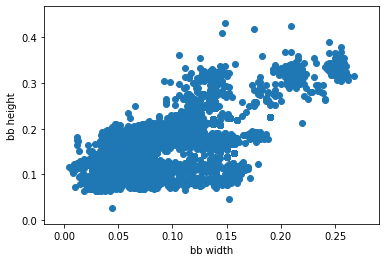

In [16]:
plot_bb(in_images, normalized=True)

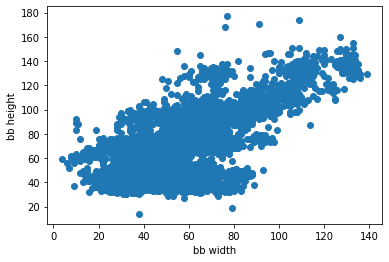

In [17]:
plot_bb(in_images)

You can now proceed to the next notebook to preprocess images and annotations for Tensorflow OD API.